**Question 2 - Credit Card Fraud Detection**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv('/content/fraudTrain.csv')

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852484 entries, 0 to 852483
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             852484 non-null  int64  
 1   trans_date_trans_time  852484 non-null  object 
 2   cc_num                 852484 non-null  int64  
 3   merchant               852484 non-null  object 
 4   category               852484 non-null  object 
 5   amt                    852484 non-null  float64
 6   first                  852484 non-null  object 
 7   last                   852484 non-null  object 
 8   gender                 852484 non-null  object 
 9   street                 852484 non-null  object 
 10  city                   852483 non-null  object 
 11  state                  852483 non-null  object 
 12  zip                    852483 non-null  float64
 13  lat                    852483 non-null  float64
 14  long                   852483 non-nu

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654.0,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160.0,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252.0,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632.0,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433.0,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [6]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
# Printing the unique values for each column

cols = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud']

for col in cols:
    print(f"{col} : {len(df[col].unique())}")

Unnamed: 0 : 852484
trans_date_trans_time : 838133
cc_num : 956
merchant : 693
category : 14
amt : 44842
first : 346
last : 476
gender : 2
street : 957
city : 874
state : 52
zip : 944
lat : 942
long : 943
city_pop : 859
job : 491
dob : 942
trans_num : 852484
unix_time : 838165
merch_lat : 831161
merch_long : 843449
is_fraud : 3


In [8]:
df.drop(['Unnamed: 0', 'unix_time'], axis = 1, inplace = True)

In [9]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654.0,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160.0,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252.0,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632.0,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433.0,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0.0


In [10]:

df.is_fraud.value_counts()

,count
is_fraud,
0.0,847601
1.0,4882


In [11]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,8.524840e+05,852484.000000,852483.000000,852483.000000,852483.000000,8.524830e+05,852483.000000,852483.000000,852483.000000
mean,4.166383e+17,70.285937,48791.269962,38.534764,-90.220692,8.898661e+04,38.534482,-90.220721,0.005727
std,1.308193e+18,163.184038,26897.321169,5.075064,13.760934,3.024028e+05,5.109356,13.772924,0.075459
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,19.027785,-166.671242,0.000000
25%,1.800365e+14,9.640000,26237.000000,34.668900,-96.798000,7.430000e+02,34.737630,-96.893661,0.000000
50%,3.520550e+15,47.410000,48174.000000,39.354300,-87.476900,2.456000e+03,39.364622,-87.434392,0.000000
75%,4.642255e+15,83.072500,72011.000000,41.894800,-80.158000,2.047800e+04,41.953118,-80.228021,0.000000
max,4.992346e+18,28948.900000,99783.000000,66.693300,-67.950300,2.906700e+06,67.510267,-66.956540,1.000000


In [12]:
df.amt.value_counts()

,count
amt,
1.04,370
1.02,370
1.14,368
1.40,359
1.01,354
...,...
1433.88,1
1284.76,1
799.74,1


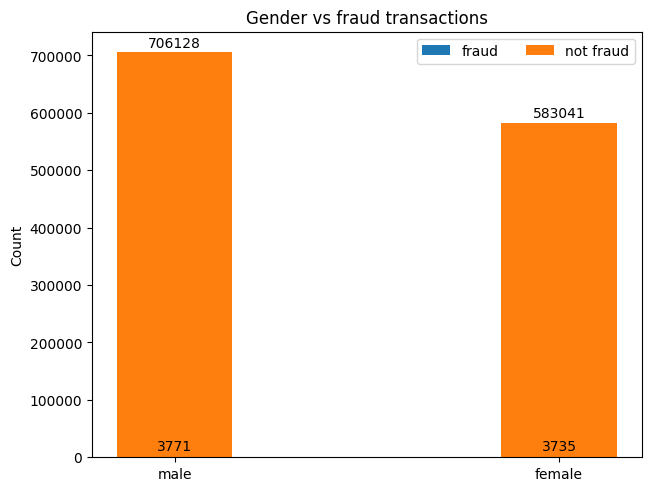

In [13]:
gender = ["male", 'female']
fraud_count = {
    'fraud': {3771, 3735},
    'not fraud' : {706128, 583041}
}

x = np.arange(len(gender))
width = 0.3
mult = 0

fig, ax = plt.subplots(layout = 'constrained')
for attr, val in fraud_count.items():
    offset = mult * width
    rects = ax.bar(x + width, val, width, label = attr)
    ax.bar_label(rects, padding = 1.5)
    mult += 1


ax.set_ylabel("Count")
ax.set_xticks(width + x, gender)
ax.set_title("Gender vs fraud transactions")
ax.legend(ncols = 2)
plt.show()

In [14]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [15]:
def date_time_analysis(df):
#     newdf = df.copy()
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['dob'] = pd.to_datetime(df['dob'])

    df['transact_hour'] = df['trans_date_trans_time'].dt.hour
    df['transact_mth'] = df['trans_date_trans_time'].dt.month
    df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

# newdf = df.copy()
date_time_analysis(df)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,transact_hour,transact_mth,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654.0,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0.0,0,1,31.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160.0,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0.0,0,1,41.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252.0,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0.0,0,1,57.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632.0,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0.0,0,1,52.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433.0,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0.0,0,1,33.0


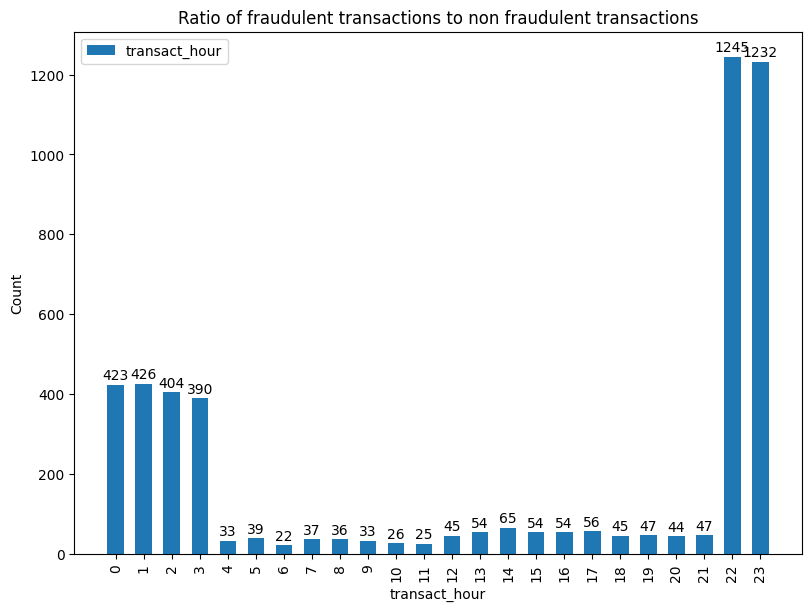

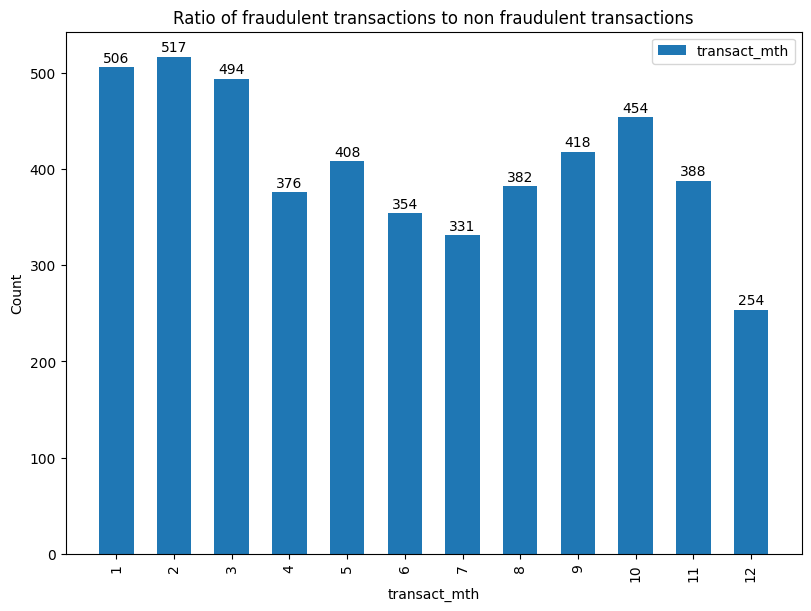

In [16]:
def plot_fraud_counts_by_column(df, column):
    fraud_df = df[df.is_fraud == 1]
    non_df = df[df.is_fraud == 0]
    fraud_ratio = fraud_df.groupby(column).size()

    categories = fraud_ratio.index
    x = np.arange(len(categories))
    width = 0.6
    mult = 0

    fig, ax = plt.subplots(layout='constrained', figsize = (8, 6))
    rects = ax.bar(x, fraud_ratio, width, label = column)
    ax.bar_label(rects, padding = 1.5)

    ax.set_ylabel("Count")
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=90)
    ax.set_xlabel(column)
    ax.set_title("Ratio of fraudulent transactions to non fraudulent transactions")
    ax.legend(ncols=2)
    plt.show()

columns = ['transact_hour', 'transact_mth']
for cols in columns:
    plot_fraud_counts_by_column(df, cols)

In [17]:
region_boundaries = {
    'NewEngland': {'lat_range': (40, 47), 'long_range': (-74, -66)},
    'NY_NJ_PuertoRico_VirginIslands': {'lat_range': (17, 45), 'long_range': (-80, -65)},
    'MidAtlantic': {'lat_range': (36, 42), 'long_range': (-83, -74)},
    'Southeast': {'lat_range': (24, 39), 'long_range': (-91, -75)},
    'Midwest': {'lat_range': (36, 49), 'long_range': (-93, -80)},
    'SouthCentral': {'lat_range': (25, 37), 'long_range': (-106, -89)},
    'Plains': {'lat_range': (36, 43), 'long_range': (-102, -89)},
    'Mountain': {'lat_range': (37, 49), 'long_range': (-114, -102)},
    'WestCoast_PacificIslands': {'lat_range': (13, 42), 'long_range': (-160, -105)},
    'Northwest_Alaska': {'lat_range': (42, 72), 'long_range': (-150, -110)}
}

def get_region_by_lat_long(lat, long):
    for region, bounds in region_boundaries.items():
        lat_min, lat_max = bounds['lat_range']
        long_min, long_max = bounds['long_range']
        if lat_min <= lat <= lat_max and long_min <= long <= long_max:
            return region
    return "Outside US"

df['cust_loc'] = df.apply(lambda row: get_region_by_lat_long(row['lat'], row['long']), axis=1)
df['merch_loc'] = df.apply(lambda row: get_region_by_lat_long(row['merch_lat'], row['merch_long']), axis=1)

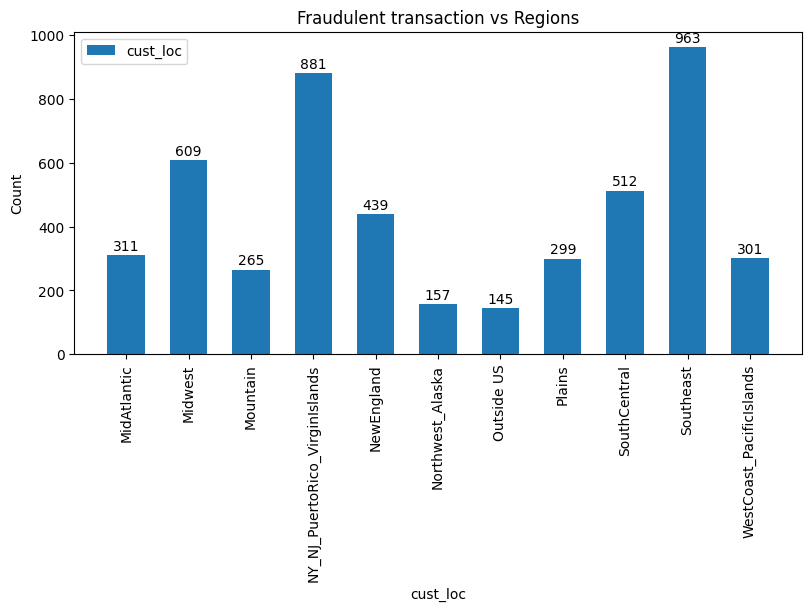

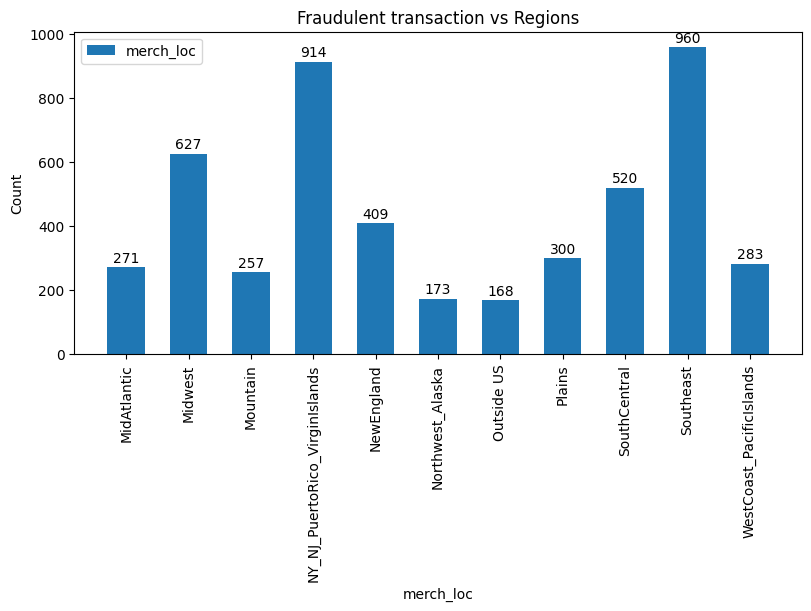

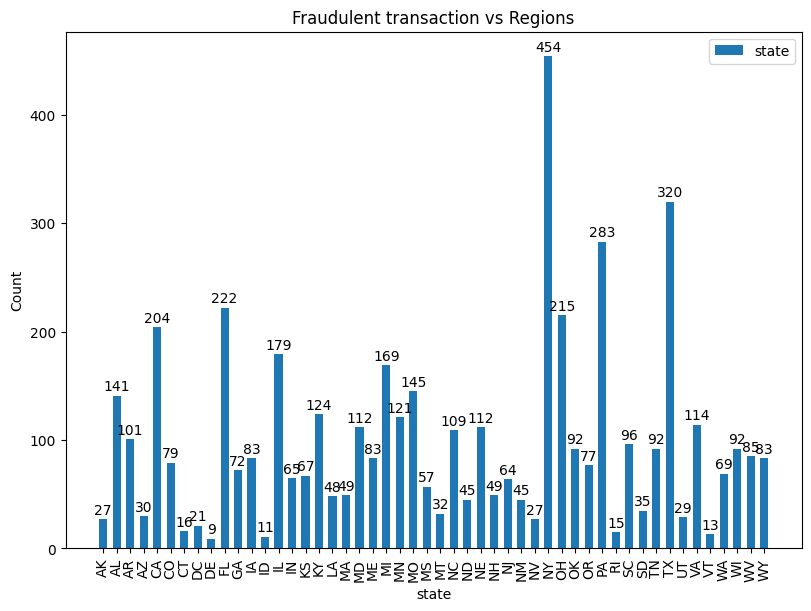

In [18]:
def plot_fraud_counts_by_column(df, column):
    fraud_df = df[df.is_fraud == 1]
    non_df = df[df.is_fraud == 0]
    fraud_count = fraud_df.groupby(column).size()

    categories = fraud_count.index
    x = np.arange(len(categories))
    width = 0.6
    mult = 0

    fig, ax = plt.subplots(layout='constrained', figsize = (8, 6))
    rects = ax.bar(x, fraud_count, width, label = column)
    ax.bar_label(rects, padding = 1.5)

    ax.set_ylabel("Count")
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=90)
    ax.set_xlabel(column)
    ax.set_title("Fraudulent transaction vs Regions")
    ax.legend(ncols=2)
    plt.show()

columns = ['cust_loc', 'merch_loc', 'state']
for cols in columns:
    plot_fraud_counts_by_column(df, cols)

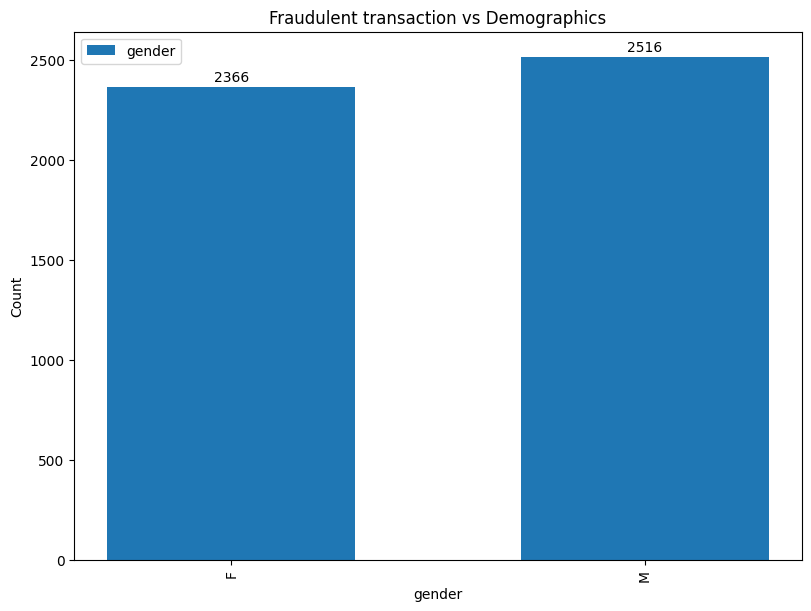

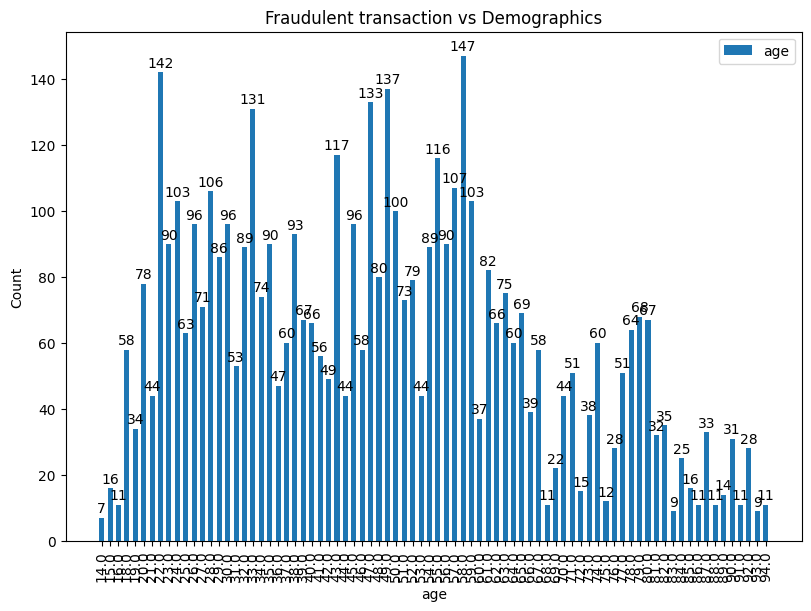

In [19]:
def plot_fraud_counts_by_column(df, column):
    fraud_df = df[df.is_fraud == 1]
    non_df = df[df.is_fraud == 0]
    fraud_count = fraud_df.groupby(column).size()

    categories = fraud_count.index
    x = np.arange(len(categories))
    width = 0.6
    mult = 0

    fig, ax = plt.subplots(layout='constrained', figsize = (8, 6))
    rects = ax.bar(x, fraud_count, width, label = column)
    ax.bar_label(rects, padding = 1.5)

    ax.set_ylabel("Count")
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=90)
    ax.set_xlabel(column)
    ax.set_title("Fraudulent transaction vs Demographics")
    ax.legend(ncols=2)
    plt.show()

columns = ['gender', 'age']
for cols in columns:
    plot_fraud_counts_by_column(df, cols)

In [20]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud', 'transact_hour', 'transact_mth', 'age',
       'cust_loc', 'merch_loc'],
      dtype='object')

In [21]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,transact_hour,transact_mth,age,cust_loc,merch_loc
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654.0,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0.0,0,1,31.0,MidAtlantic,MidAtlantic
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160.0,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0.0,0,1,41.0,Northwest_Alaska,Northwest_Alaska
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252.0,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0.0,0,1,57.0,Mountain,Mountain
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632.0,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0.0,0,1,52.0,Mountain,Mountain
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433.0,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0.0,0,1,33.0,NY_NJ_PuertoRico_VirginIslands,NY_NJ_PuertoRico_VirginIslands


In [22]:
df.drop(['trans_date_trans_time', 'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long', 'dob', 'trans_num',
        'merch_lat', 'merch_long'], axis = 1, inplace = True)

In [23]:
df.head()

,cc_num,merchant,category,amt,gender,city_pop,job,is_fraud,transact_hour,transact_mth,age,cust_loc,merch_loc
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,3495.0,"Psychologist, counselling",0.0,0,1,31.0,MidAtlantic,MidAtlantic
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,149.0,Special educational needs teacher,0.0,0,1,41.0,Northwest_Alaska,Northwest_Alaska
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,4154.0,Nature conservation officer,0.0,0,1,57.0,Mountain,Mountain
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,1939.0,Patent attorney,0.0,0,1,52.0,Mountain,Mountain
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,99.0,Dance movement psychotherapist,0.0,0,1,33.0,NY_NJ_PuertoRico_VirginIslands,NY_NJ_PuertoRico_VirginIslands


In [24]:
df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'city_pop', 'job',
       'is_fraud', 'transact_hour', 'transact_mth', 'age', 'cust_loc',
       'merch_loc'],
      dtype='object')

In [25]:
cols = ['cc_num', 'merchant', 'category', 'amt', 'gender',
       'city_pop', 'job', 'is_fraud', 'transact_hour', 'transact_mth', 'age',
       'cust_loc', 'merch_loc']

for col in cols:
    print(f"{col} : {len(df[col].unique())}")

cc_num : 956
merchant : 693
category : 14
amt : 44842
gender : 2
city_pop : 859
job : 491
is_fraud : 3
transact_hour : 24
transact_mth : 12
age : 82
cust_loc : 11
merch_loc : 11


In [26]:
df.describe()

,cc_num,amt,city_pop,is_fraud,transact_hour,transact_mth,age
count,8.524840e+05,852484.000000,8.524830e+05,852483.000000,852484.000000,852484.000000,852483.000000
mean,4.166383e+17,70.285937,8.898661e+04,0.005727,12.800216,6.737817,45.798030
std,1.308193e+18,163.184038,3.024028e+05,0.075459,6.814556,3.255660,17.358127
min,6.041621e+10,1.000000,2.300000e+01,0.000000,0.000000,1.000000,14.000000
25%,1.800365e+14,9.640000,7.430000e+02,0.000000,7.000000,4.000000,32.000000
50%,3.520550e+15,47.410000,2.456000e+03,0.000000,14.000000,7.000000,44.000000
75%,4.642255e+15,83.072500,2.047800e+04,0.000000,19.000000,9.000000,57.000000
max,4.992346e+18,28948.900000,2.906700e+06,1.000000,23.000000,12.000000,95.000000


In [27]:
newdf = df.copy()

In [28]:
def percentage_encode(df, col):
    normalized_count = df[col].value_counts(normalize = True) * 100
    df[col] = df[col].map(normalized_count)

cols = ['cc_num', 'merchant', 'city_pop', 'job']
# percentage_encode(newdf, cols)
for col in cols:
    percentage_encode(newdf, col)

In [29]:
newdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852484 entries, 0 to 852483
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   cc_num         852484 non-null  float64
 1   merchant       852484 non-null  float64
 2   category       852484 non-null  object 
 3   amt            852484 non-null  float64
 4   gender         852484 non-null  object 
 5   city_pop       852483 non-null  float64
 6   job            852483 non-null  float64
 7   is_fraud       852483 non-null  float64
 8   transact_hour  852484 non-null  int32  
 9   transact_mth   852484 non-null  int32  
 10  age            852483 non-null  float64
 11  cust_loc       852484 non-null  object 
 12  merch_loc      852484 non-null  object 
dtypes: float64(7), int32(2), object(4)
memory usage: 78.0+ MB


In [30]:
newdf.head()

,cc_num,merchant,category,amt,gender,city_pop,job,is_fraud,transact_hour,transact_mth,age,cust_loc,merch_loc
0,0.157892,0.100647,misc_net,4.97,F,0.157892,0.276604,0.0,0,1,31.0,MidAtlantic,MidAtlantic
1,0.235664,0.192731,grocery_pos,107.23,F,0.236838,0.390858,0.0,0,1,41.0,Northwest_Alaska,Northwest_Alaska
2,0.037655,0.143815,entertainment,220.11,M,0.037655,0.037655,0.0,0,1,57.0,Mountain,Mountain
3,0.039414,0.197423,gas_transport,45.00,M,0.039414,0.194725,0.0,0,1,52.0,Mountain,Mountain
4,0.156249,0.122466,misc_pos,41.96,M,0.194843,0.156249,0.0,0,1,33.0,NY_NJ_PuertoRico_VirginIslands,NY_NJ_PuertoRico_VirginIslands


In [31]:
def label_encoder(df, columns):
    for cols in columns:
        unique_values = df[cols].unique()
        name_to_num = {name: i for i, name in enumerate(unique_values)}
        df[cols] = df[cols].map(name_to_num).astype(int)
cols = ['gender']
label_encoder(newdf, cols)

In [32]:
newdf.head()

,cc_num,merchant,category,amt,gender,city_pop,job,is_fraud,transact_hour,transact_mth,age,cust_loc,merch_loc
0,0.157892,0.100647,misc_net,4.97,0,0.157892,0.276604,0.0,0,1,31.0,MidAtlantic,MidAtlantic
1,0.235664,0.192731,grocery_pos,107.23,0,0.236838,0.390858,0.0,0,1,41.0,Northwest_Alaska,Northwest_Alaska
2,0.037655,0.143815,entertainment,220.11,1,0.037655,0.037655,0.0,0,1,57.0,Mountain,Mountain
3,0.039414,0.197423,gas_transport,45.00,1,0.039414,0.194725,0.0,0,1,52.0,Mountain,Mountain
4,0.156249,0.122466,misc_pos,41.96,1,0.194843,0.156249,0.0,0,1,33.0,NY_NJ_PuertoRico_VirginIslands,NY_NJ_PuertoRico_VirginIslands


In [33]:
def onehotencode(df, columns):
#     df = df.copy()
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column).astype(int)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

columns = ['category', 'cust_loc', 'merch_loc']
newdf = onehotencode(newdf, columns)

In [36]:
newdf

,cc_num,merchant,amt,gender,city_pop,job,is_fraud,transact_hour,transact_mth,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,cust_loc_MidAtlantic,cust_loc_Midwest,cust_loc_Mountain,cust_loc_NY_NJ_PuertoRico_VirginIslands,cust_loc_NewEngland,cust_loc_Northwest_Alaska,cust_loc_Outside US,cust_loc_Plains,cust_loc_SouthCentral,cust_loc_Southeast,cust_loc_WestCoast_PacificIslands,merch_loc_MidAtlantic,merch_loc_Midwest,merch_loc_Mountain,merch_loc_NY_NJ_PuertoRico_VirginIslands,merch_loc_NewEngland,merch_loc_Northwest_Alaska,merch_loc_Outside US,merch_loc_Plains,merch_loc_SouthCentral,merch_loc_Southeast,merch_loc_WestCoast_PacificIslands
0,0.157892,0.100647,4.97,0,0.157892,0.276604,0.0,0,1,31.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.235664,0.192731,107.23,0,0.236838,0.390858,0.0,0,1,41.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.037655,0.143815,220.11,1,0.037655,0.037655,0.0,0,1,57.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.039414,0.197423,45.00,1,0.039414,0.194725,0.0,0,1,52.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0.156249,0.122466,41.96,1,0.194843,0.156249,0.0,0,1,33.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852479,0.039883,0.143698,132.60,0,0.039883,0.079063,0.0,21,12,36.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
852480,0.155545,0.131029,22.47,0,0.155546,0.155546,0.0,21,12,54.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
852481,0.041408,0.138067,38.57,0,0.041408,0.282469,0.0,21,12,58.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
852482,0.120002,0.190268,30.91,1,0.120002,0.236486,0.0,21,12,54.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
